Correlation Table for S&P 500?

## Stock Price prediction based on the usage of RNN | LSTM

Predicting the close stock price

In [1]:
#!python3.9 -m pip install --upgrade mplfinance
#!python3.9 -m pip --upgrade pandas
# !python3.9 -m pip install pandas-datareader --upgrade
# !python3.9 -m pip install yfinance

In [2]:
import math
import pandas_datareader.data as web
import numpy as np
import pandas as pd
import datetime
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
# from mplfinance import candlestick_ohlc
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mdates
plt.style.use('fivethirtyeight')


2023-02-08 11:47:51.047988: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Fill in the stock you want to crawl:

In [3]:
company = 'QQQ'
provider = 'yahoo'

In [4]:
# Get stock quote
#start = datetime.datetime(2018-3-1) # Change Date if needed
start = datetime.datetime(2018, 1, 1) # Change Date if needed

end = datetime.datetime.now()
#df = web.DataReader(company, provider, start, end)

In [5]:
from pandas_datareader import data as pdr
import yfinance as yfin

In [6]:
# df = web.DataReader(company, provider, start, end)

yfin.pdr_override()

df = pdr.get_data_yahoo(company, start, end)

[*********************100%***********************]  1 of 1 completed


In [7]:
'''plt.figure(figsize = (18,9))
plt.plot(range(df.shape[0]),(df['Low']+df['High'])/2.0)
plt.xticks(range(0,df.shape[0],500),df['Date'].loc[::500],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.show()'''

"plt.figure(figsize = (18,9))\nplt.plot(range(df.shape[0]),(df['Low']+df['High'])/2.0)\nplt.xticks(range(0,df.shape[0],500),df['Date'].loc[::500],rotation=45)\nplt.xlabel('Date',fontsize=18)\nplt.ylabel('Mid Price',fontsize=18)\nplt.show()"

In [8]:
# Look at closing price for every day of this year
'''plt.figure(figsize=(12,6))
plt.title('Close Price Hist',fontsize=11)
plt.plot(df['Adj Close'])
plt.xlabel('Date', fontsize=11)
plt.ylabel('Close Price US $', fontsize=11)'''

"plt.figure(figsize=(12,6))\nplt.title('Close Price Hist',fontsize=11)\nplt.plot(df['Adj Close'])\nplt.xlabel('Date', fontsize=11)\nplt.ylabel('Close Price US $', fontsize=11)"

In [9]:
df.shape

(1284, 6)

In [10]:
df['70ma'] = df['Adj Close'].rolling(window=70).mean()
df['20ma'] = df['Adj Close'].rolling(window=20).mean()
df.dropna(inplace=True)

In [11]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,70ma,20ma
Date,,,,,,,,
2023-02-01,294.410004,303.429993,292.299988,300.920013,300.920013,67562200,278.641152,281.738997
2023-02-02,307.570007,313.679993,306.730011,311.720001,311.720001,83070600,279.169121,284.037997
2023-02-03,304.940002,312.390015,304.540009,306.179993,306.179993,76110300,279.574764,286.267998
2023-02-06,303.510010,305.910004,302.220001,303.589996,303.589996,40802300,279.861318,288.007498
2023-02-07,303.459991,311.029999,302.320007,309.880005,309.880005,67415100,280.327230,289.974498


In [12]:
# df_small = df.tail(100)

In [13]:

'''ax1 = plt.subplot2grid((6,1), (0,0), rowspan = 5, colspan = 1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan = 1, colspan = 1, sharex=ax1)
#ax1.ticklabel_format(useOffset=False)
ax1.ticklabel_format(style='plain')


ax1.plot(df_small.index, df_small['Adj Close'])
ax1.plot(df_small.index, df_small['70ma'])
#ax1.plot(df.index, df_small['20ma'])
ax1.plot(df_small.index, df_small['Volume'])

plt.show'''

"ax1 = plt.subplot2grid((6,1), (0,0), rowspan = 5, colspan = 1)\nax2 = plt.subplot2grid((6,1), (5,0), rowspan = 1, colspan = 1, sharex=ax1)\n#ax1.ticklabel_format(useOffset=False)\nax1.ticklabel_format(style='plain')\n\n\nax1.plot(df_small.index, df_small['Adj Close'])\nax1.plot(df_small.index, df_small['70ma'])\n#ax1.plot(df.index, df_small['20ma'])\nax1.plot(df_small.index, df_small['Volume'])\n\nplt.show"

In [14]:
df_ohlc = df['Adj Close'].resample('10D').ohlc() # open high low close
df_ohlc.dropna(inplace=True)
df_vol = df['Volume'].resample('10D').sum()

In [15]:
df_ohlc.tail(5)

,open,high,low,close
Date,,,,
2022-12-27,263.579987,266.440002,260.100006,261.579987
2023-01-06,268.799988,280.970001,268.799988,280.970001
2023-01-16,281.540009,288.959991,275.149994,287.730011
2023-01-26,293.339996,311.720001,290.269989,306.179993
2023-02-05,303.589996,309.880005,303.589996,309.880005


In [16]:
df_ohlc.reset_index(inplace=True)

In [17]:
df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)

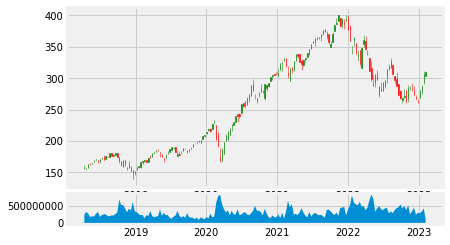

In [18]:
ax1 = plt.subplot2grid((6,1), (0,0), rowspan = 5, colspan = 1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan = 1, colspan = 1, sharex=ax1)
ax2.ticklabel_format(style='plain')

ax1.xaxis_date()
candlestick_ohlc(ax1, df_ohlc.values, width=2, colorup='g')
ax2.fill_between(df_vol.index.map(mdates.date2num), df_vol.values,0)

## Train the model

In [19]:
df.head(2)

,Open,High,Low,Close,Adj Close,Volume,70ma,20ma
Date,,,,,,,,
2018-04-12,161.250000,162.770004,161.160004,162.210007,156.971771,30467900,158.909501,156.626057
2018-04-13,163.020004,163.259995,160.669998,161.369995,156.158859,44604900,158.952864,156.147903


In [20]:
# Create new df w/ "Close" col

df2 = df.filter(['Close'])
# convert to numpy array
dataset = df2.values

# Get no of rows to train the (LSTM) model on
# train it on 80 % of the data 
training_data_len = math.ceil(len(dataset) * .8)  # math.ceil -> rounding
training_data_len

972

In [21]:
# Scale the data (scaling or normalization helps the model)

scaler = MinMaxScaler(feature_range=(0,1))  # values / features ranges 0-1 inclusive

# Transformed data
scaled_data = scaler.fit_transform(dataset.reshape(-1,1))
# scaled_data

In [22]:
# Create the training data set
# Create scaled training data set
# train_data = scaled_data[0:training_data_len, :]

# Split data into x_train & y_train data set
#reate empty lists
x_train = [] # independent variables / features
y_train = [] # dependent / target variable

prediction_days = 180 # 60 days, modify as needed

for i in range(prediction_days, len(scaled_data)):  
    x_train.append(scaled_data[i - prediction_days:i, 0]) # never reaches i, not including i
    y_train.append(scaled_data[i, 0])
    # if i  <= 60:
        #print(x_train)
        #print()
        #print(y_train)
        #print()

In [23]:
# Convert x_train & y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [24]:
x_train.shape

(1035, 180)

In [25]:
# Reshape data, LSTM expects input to be 3-dimensional
# x_train = np.shape(x_train, (943, 60, 1))
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))



In [26]:
# Build LSTM model
# This will be the model architecture
from keras.layers import Dropout


model = Sequential()
model.add(LSTM(20, return_sequences=True, input_shape=(x_train.shape[1], 1)))
#model.add(Dropout(.2))
model.add(LSTM(20, return_sequences=True))
#model.add(Dropout(.2))
model.add(LSTM(20, return_sequences=False))
#model.add(Dense(25))
model.add(Dense(1))

# the number of hidden units should be in-between the number of input units and output classes

2023-02-08 11:48:16.602373: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [27]:
'''# Build LSTM model
# This will be the model architecture
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))'''

'# Build LSTM model\n# This will be the model architecture\nmodel = Sequential()\nmodel.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))\nmodel.add(LSTM(50, return_sequences=False))\nmodel.add(Dense(25))\nmodel.add(Dense(1))'

In [28]:
# cat boost -> https://catboost.ai/en/docs/concepts/parameter-tuning

In [29]:
# Compile model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [30]:
# Train model
# model.fit(x_train, y_train, batch_size=5, epochs=7) 
history = model.fit(x_train, y_train, epochs=10, batch_size=5) #validation_split=0.33  , verbose=0


Epoch 1/10
207/207 [==============================] - 42s 163ms/step - loss: 0.0155 - accuracy: 9.6618e-04
Epoch 2/10
207/207 [==============================] - 28s 137ms/step - loss: 0.0027 - accuracy: 9.6618e-04
Epoch 3/10
207/207 [==============================] - 34s 166ms/step - loss: 0.0023 - accuracy: 9.6618e-04
Epoch 4/10
207/207 [==============================] - 28s 137ms/step - loss: 0.0021 - accuracy: 9.6618e-04
Epoch 5/10
207/207 [==============================] - 26s 123ms/step - loss: 0.0022 - accuracy: 9.6618e-04
Epoch 6/10
207/207 [==============================] - 25s 122ms/step - loss: 0.0016 - accuracy: 9.6618e-04
Epoch 7/10
207/207 [==============================] - 29s 139ms/step - loss: 0.0015 - accuracy: 9.6618e-04
Epoch 8/10
207/207 [==============================] - 30s 143ms/step - loss: 0.0013 - accuracy: 9.6618e-04
Epoch 9/10
207/207 [==============================] - 27s 131ms/step - loss: 0.0012 - accuracy: 9.6618e-04
Epoch 10/10
207/207 [================

In [31]:
'''plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()'''

"plt.plot(history.history['accuracy'])\nplt.plot(history.history['val_accuracy'])\nplt.title('model accuracy')\nplt.ylabel('accuracy')\nplt.xlabel('epoch')\nplt.legend(['train', 'test'], loc='upper left')\nplt.show()"

In [32]:
# Create testing dataset
# Create new array containing scaled values from 900 - 960
test_data = scaled_data[training_data_len - prediction_days: , :]

# Create data set x_test & y_test
x_test = []
y_test = dataset[training_data_len: , :]  # all of values that we want the model to predict, the actual test values
for i in range(prediction_days, len(test_data)):
    x_test.append(test_data[i- prediction_days:i, 0])

In [33]:
# Convert data to numpy array
x_test = np.array(x_test)

In [34]:
# Reshape data -> 3-dimensional shape
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))   # x_test.shape[0] -> number of samples ; x_test.shape[1] -> number of timesteps; number of features: 1 (close price)


In [35]:
# Get the models predicted price values

predictions = model.predict(x_test)
# we want predictions to contain same values as y_test data set
predictions = scaler.inverse_transform(predictions)  # unscale values

8/8 [==============================] - 2s 47ms/step


In [36]:
# Get root mean square error (RSME)
rmse = np.sqrt(np.mean(((predictions- y_test)**2)))

In [37]:
# rmse =np.sqrt(np.mean(((predictions- y_test)**2)))
# rmse = np.sqrt(np.mean(np.power((np.array(y_test)-np.array(predictions)),2)))
# rmse = np.sqrt(((predictions - y_test) ** 2).mean())

In [38]:
rmse

11.363572086485561

### Plotting 

/var/folders/gr/77dww1vx4k945hzph39jwlc40000gn/T/ipykernel_12639/789320371.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


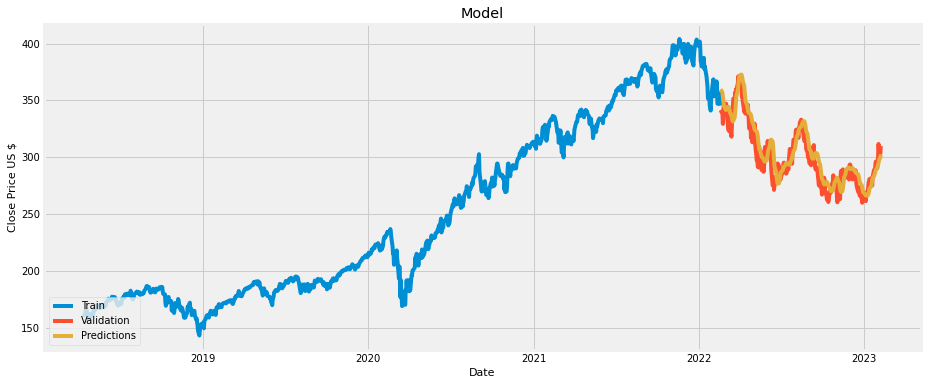

In [39]:
# Plot data
train = df[:training_data_len]
valid = df[training_data_len:]
valid['Predictions'] = predictions

# Viz
plt.figure(figsize=(14,6))
plt.title('Model')
plt.xlabel('Date', fontsize=11)
plt.ylabel('Close Price US $', fontsize=11)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Validation', 'Predictions'], loc='lower left')

blue = data the model was trained on
red = actual values / actual closing price for the dates
orange = what model predicted to be

In [40]:
# Show valid and predicted price
valid.tail()

,Open,High,Low,Close,Adj Close,Volume,70ma,20ma,Predictions
Date,,,,,,,,,
2023-02-01,294.410004,303.429993,292.299988,300.920013,300.920013,67562200,278.641152,281.738997,293.554871
2023-02-02,307.570007,313.679993,306.730011,311.720001,311.720001,83070600,279.169121,284.037997,295.131897
2023-02-03,304.940002,312.390015,304.540009,306.179993,306.179993,76110300,279.574764,286.267998,297.419189
2023-02-06,303.510010,305.910004,302.220001,303.589996,303.589996,40802300,279.861318,288.007498,300.046692
2023-02-07,303.459991,311.029999,302.320007,309.880005,309.880005,67415100,280.327230,289.974498,302.573212


# Predict close price for future

In [41]:
df_future = df.filter(['Close'])
last_60_days = df_future[-prediction_days:].values
last_60_days_scaled = scaler.transform(last_60_days)
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

1/1 [==============================] - 0s 49ms/step
[[305.06833]]


In [42]:
df_future = df.filter(['Close'])
last_60_days = df_future[-prediction_days-2:].values
last_60_days_scaled = scaler.transform(last_60_days)
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(f'Prediction: {pred_price}')


1/1 [==============================] - 2s 2s/step
Prediction: [[305.06833]]


In [43]:
# Prediction: [[283.78705]]


--------------------
--------------------

## Different approach

In [44]:
'''test_start = datetime.datetime(2022,1,1)
test_end = datetime.datetime.now()

test_df = web.DataReader(company, 'yahoo', test_start, test_end)
actual_prices = test_df['Close'].values

total_dataset = pd.concat((df['Close'], test_df['Close']), axis=0)

model_inputs = total_dataset[len(total_dataset) - len(test_df) - prediction_days:].values
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.transform(model_inputs)'''

"test_start = datetime.datetime(2022,1,1)\ntest_end = datetime.datetime.now()\n\ntest_df = web.DataReader(company, 'yahoo', test_start, test_end)\nactual_prices = test_df['Close'].values\n\ntotal_dataset = pd.concat((df['Close'], test_df['Close']), axis=0)\n\nmodel_inputs = total_dataset[len(total_dataset) - len(test_df) - prediction_days:].values\nmodel_inputs = model_inputs.reshape(-1,1)\nmodel_inputs = scaler.transform(model_inputs)"

In [45]:
# Make predictions on test data

In [69]:
x_test = []

for i in range(prediction_days, len(model_inputs)):
  x_test.append(model_inputs[i-prediction_days:i,0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

IndexError: tuple index out of range

NameError: name 'predicted_prices' is not defined

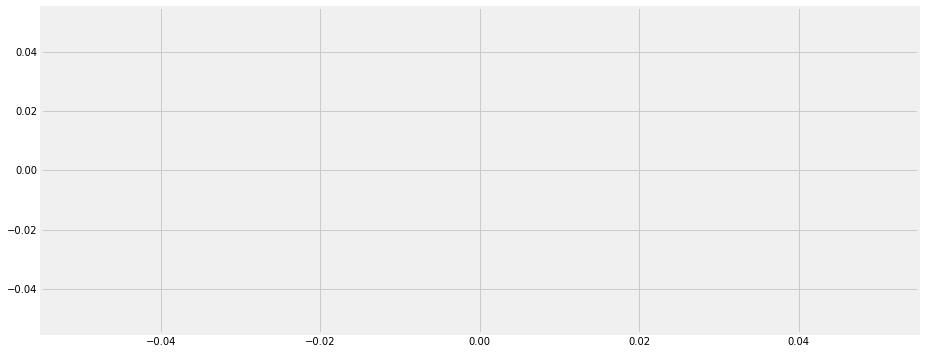

In [68]:
# Plot the test pred
plt.figure(figsize=(14,6))
plt.plot(actual_prices, color='black', label=f'Actual {company} Price')
plt.plot(predicted_prices, color='green', label=f'Predicted {company} Price')
plt.title(f'{company} Share Price')
plt.xlabel('Time')
plt.ylabel(f'{company} Share Price in US $')
plt.legend(loc='upper left')

In [ ]:
# Predict next day

real_data = [model_inputs[len(model_inputs) + 1 - prediction_days:len(model_inputs + 1), 0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1],1))

# print(scaler.inverse_transform(real_data[-1]))

prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print(f'Prediction: {prediction}')


1/1 [==============================] - 0s 48ms/step
Prediction: [[281.6141]]


Different approach w/ avg of highest and lowest price



In [ ]:
# First calculate the mid prices from the highest and lowest
high_prices = df.loc[:,'High'].as_matrix()
low_prices = df.loc[:,'Low'].as_matrix()
mid_prices = (high_prices+low_prices)/2.0

In [ ]:
train_data = mid_prices[:11000]
test_data = mid_prices[11000:]

In [ ]:
scaler = MinMaxScaler()
train_data = train_data.reshape(-1,1)
test_data = test_data.reshape(-1,1)

In [ ]:
# Train the Scaler with training data and smooth data
smoothing_window_size = 2500
for di in range(0,10000,smoothing_window_size):
    scaler.fit(train_data[di:di+smoothing_window_size,:])
    train_data[di:di+smoothing_window_size,:] = scaler.transform(train_data[di:di+smoothing_window_size,:])

# You normalize the last bit of remaining data
scaler.fit(train_data[di+smoothing_window_size:,:])
train_data[di+smoothing_window_size:,:] = scaler.transform(train_data[di+smoothing_window_size:,:])

In [ ]:
train_data = train_data.reshape(-1)

# Normalize test data
test_data = scaler.transform(test_data).reshape(-1)

In [ ]:
EMA = 0.0
gamma = 0.1
for ti in range(11000):
  EMA = gamma*train_data[ti] + (1-gamma)*EMA
  train_data[ti] = EMA

# Used for visualization and test purposes
all_mid_data = np.concatenate([train_data,test_data],axis=0)

In [ ]:
window_size = 100
N = train_data.size
std_avg_predictions = []
std_avg_x = []
mse_errors = []

for pred_idx in range(window_size,N):

    if pred_idx >= N:
        date = dt.datetime.strptime(k, '%Y-%m-%d').date() + dt.timedelta(days=1)
    else:
        date = df.loc[pred_idx,'Date']

    std_avg_predictions.append(np.mean(train_data[pred_idx-window_size:pred_idx]))
    mse_errors.append((std_avg_predictions[-1]-train_data[pred_idx])**2)
    std_avg_x.append(date)

print('MSE error for standard averaging: %.5f'%(0.5*np.mean(mse_errors)))

In [ ]:
plt.figure(figsize = (18,9))
plt.plot(range(df.shape[0]),all_mid_data,color='b',label='True')
plt.plot(range(window_size,N),std_avg_predictions,color='orange',label='Prediction')
#plt.xticks(range(0,df.shape[0],50),df['Date'].loc[::50],rotation=45)
plt.xlabel('Date')
plt.ylabel('Mid Price')
plt.legend(fontsize=18)
plt.show()

In [ ]:
window_size = 100
N = train_data.size

run_avg_predictions = []
run_avg_x = []

mse_errors = []

running_mean = 0.0
run_avg_predictions.append(running_mean)

decay = 0.5

for pred_idx in range(1,N):

    running_mean = running_mean*decay + (1.0-decay)*train_data[pred_idx-1]
    run_avg_predictions.append(running_mean)
    mse_errors.append((run_avg_predictions[-1]-train_data[pred_idx])**2)
    run_avg_x.append(date)

print('MSE error for EMA averaging: %.5f'%(0.5*np.mean(mse_errors)))


In [ ]:

plt.figure(figsize = (18,9))
plt.plot(range(df.shape[0]),all_mid_data,color='b',label='True')
plt.plot(range(0,N),run_avg_predictions,color='orange', label='Prediction')
#plt.xticks(range(0,df.shape[0],50),df['Date'].loc[::50],rotation=45)
plt.xlabel('Date')
plt.ylabel('Mid Price')
plt.legend(fontsize=18)
plt.show()
